In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import missingno
import gradio as gr

In [20]:
data = pd.read_csv('data/dataset.csv', index_col=0)
data.drop([col for col in data.columns if 'future' in col], axis=1, inplace=True)

In [21]:
data

dow_jones_open_price  dow_jones_high_price  dow_jones_low_price  \
date                                                                          
2003-01-01                   NaN                   NaN                  NaN   
2003-01-02               8342.38               8608.27              8342.38   
2003-01-03               8607.38               8635.49              8552.87   
2003-01-06               8602.78               8800.59              8602.10   
2003-01-07               8775.84               8802.64              8713.03   
...                          ...                   ...                  ...   
2025-04-15              40527.82              40791.18             40346.94   
2025-04-16              40179.49              40416.80             39394.75   
2025-04-17              39745.58              39745.58             38950.31   
2025-04-18                   NaN                   NaN                  NaN   
2025-04-21              38906.04              38906.04             37830.66   

            dow_jones_close_price  dow_jones_adj_close_price  \
date                                                           
2003-01-01                    NaN                        NaN   
2003-01-02                8607.52                    8607.52   
2003-01-03                8601.69                    8601.69   
2003-01-06                8773.57                    8773.57   
2003-01-07                8740.59                    8740.59   
...                           ...                        ...   
2025-04-15               40368.96                   40368.96   
2025-04-16               39669.39                   39669.39   
2025-04-17               39142.23                   39142.23   
2025-04-18                    NaN                        NaN   
2025-04-21               38170.41                   38170.41   

            dow_jones_trading_volume  nasdaq_open_price  nasdaq_high_price  \
date                                                                         
2003-01-01                       NaN                NaN                NaN   
2003-01-02               243910000.0            1346.93            1384.91   
2003-01-03               234000000.0            1382.36            1389.44   
2003-01-06               258040000.0            1390.19            1428.65   
2003-01-07               266970000.0            1424.26            1442.26   
...                              ...                ...                ...   
2025-04-15               529800000.0           16842.39           16979.96   
2025-04-16               737550000.0           16499.69           16600.37   
2025-04-17               657400000.0           16399.97           16408.51   
2025-04-18                       NaN                NaN                NaN   
2025-04-21               604790000.0           16052.76           16066.79   

            nasdaq_low_price  nasdaq_close_price  ...  \
date                                              ...   
2003-01-01               NaN                 NaN  ...   
2003-01-02           1336.98             1384.85  ...   
2003-01-03           1374.61             1387.08  ...   
2003-01-06           1390.09             1421.32  ...   
2003-01-07           1416.23             1431.57  ...   
...                      ...                 ...  ...   
2025-04-15          16753.22            16823.17  ...   
2025-04-16          16066.46            16307.16  ...   
2025-04-17          16181.17            16286.45  ...   
2025-04-18               NaN                 NaN  ...   
2025-04-21          15685.33            15870.90  ...   

            usd_to_uk_exchange_rate  jp_to_usd_exchange_rate  \
date                                                           
2003-01-01                      NaN                      NaN   
2003-01-02                   1.5975                   119.86   
2003-01-03                   1.6045                   119.85   
2003-01-06                   1.6080                   119.06   
2003-01-07

In [22]:
data.isnull().sum()

dow_jones_open_price           208
dow_jones_high_price           208
dow_jones_low_price            208
dow_jones_close_price          208
dow_jones_adj_close_price      208
dow_jones_trading_volume       208
nasdaq_open_price              208
nasdaq_high_price              208
nasdaq_low_price               208
nasdaq_close_price             208
nasdaq_adj_close_price         208
nasdaq_trading_volume          208
sp_open_price                  208
sp_high_price                  208
sp_low_price                   208
sp_close_price                 208
sp_adj_close_price             208
sp_trading_volume              208
usd_to_eur_exchange_rate       229
usd_to_uk_exchange_rate        229
jp_to_usd_exchange_rate        229
brent_crude_oil_price          165
cushing_crude_oil_price        228
treasury_1_year_rate           241
treasury_10_year_rate          241
breakeven_inflation_5_year     240
breakeven_inflation_10_year    240
bank_prime_loan_rate           195
federal_funds_rate  

In [23]:
missingno.matrix(data, figsize=(30,5))

<Axes: >

In [24]:
data.dropna(inplace=True)

In [25]:
data.rename(columns={' usd_to_eur_exchange_rate': ' eur_to_usd_exchange_rate', ' usd_to_uk_exchange_rate': ' uk_to_usd_exchange_rate'}, inplace=True)

In [26]:
data[' eur_to_usd_exchange_rate'] = 1/data[' eur_to_usd_exchange_rate']
data[' uk_to_usd_exchange_rate'] = 1/data[' uk_to_usd_exchange_rate']

In [27]:
data.describe()

dow_jones_open_price  dow_jones_high_price  dow_jones_low_price  \
count           5494.000000           5494.000000          5494.000000   
mean           19284.307739          19392.743724         19171.002956   
std             9755.383055           9802.329092          9704.363786   
min             6547.010000           6709.610000          6469.950000   
25%            11123.072500          11195.652500         11048.822500   
50%            16088.690000          16195.565000         15996.410000   
75%            26178.870000          26296.667500         26033.050000   
max            45054.360000          45073.630000         44799.740000   

       dow_jones_close_price  dow_jones_adj_close_price  \
count            5494.000000                5494.000000   
mean            19287.631911               19287.631911   
std              9755.733701                9755.733701   
min              6547.050000                6547.050000   
25%             11124.860000               11124.860000   
50%             16095.420000               16095.420000   
75%             26155.742500               26155.742500   
max             45014.040000               45014.040000   

       dow_jones_trading_volume  nasdaq_open_price  nasdaq_high_price  \
count              5.494000e+03        5494.000000        5494.000000   
mean               2.549666e+08        5999.424079        6039.870686   
std                1.320728e+08        4789.693019        4824.073359   
min                8.410000e+06        1266.990000        1279.590000   
25%                1.593425e+08        2304.832500        2317.230000   
50%                2.441150e+08        4123.600000        4137.400000   
75%                3.215700e+08        8049.320000        8106.552500   
max                1.412960e+09       20114.980000       20204.580000   

       nasdaq_low_price  nasdaq_close_price  ...  uk_to_usd_exchange_rate  \
count       5494.000000         5494.000000  ...              5494.000000   
mean        5954.636099         5999.872936  ...                 0.669192   
std         4750.650289         4789.364046  ...                 0.100385   
min         1253.220000         1268.640000  ...                 0.473844   
25%         2288.072500         2304.805000  ...                 0.600691   
50%         4092.960000         4123.515000  ...                 0.650449   
75%         8003.892500         8045.255000  ...                 0.766034   
max        20004.730000        20173.890000  ...                 0.934317   

       jp_to_usd_exchange_rate  brent_crude_oil_price  \
count              5494.000000            5494.000000   
mean                110.346240              72.333782   
std                  17.845649              26.065154   
min                  75.720000               9.120000   
25%                 101.840000              52.295000   
50%                 109.580000              70.740000   
75%                 117.800000              90.622500   
max                 161.730000             143.950000   

       cushing_crude_oil_price  treasury_1_year_rate  treasury_10_year_rate  \
count              5494.000000           5494.000000            5494.000000   
mean                 68.690309              1.795291               3.036356   
std                  22.930368              1.777692               1.135236   
min                 -36.980000              0.040000               0.520000   
25%                  50.615000              0.230000               2.100000   
50%                  68.280000              1.210000               2.940000   
75%                  85.590000              3.105000               4.070000   
max                 145.310000              5.490000               5.260000   

       breakeven_inflation_5_year  breakeven_inflation_10_year  \
count                 5494.000000                  5494.000000   
mean                     1.936664                     2.093493   
std                      0.57109

In [28]:
def draw_heatmap(data):
    plt.figure(figsize=(30, 30))
    sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

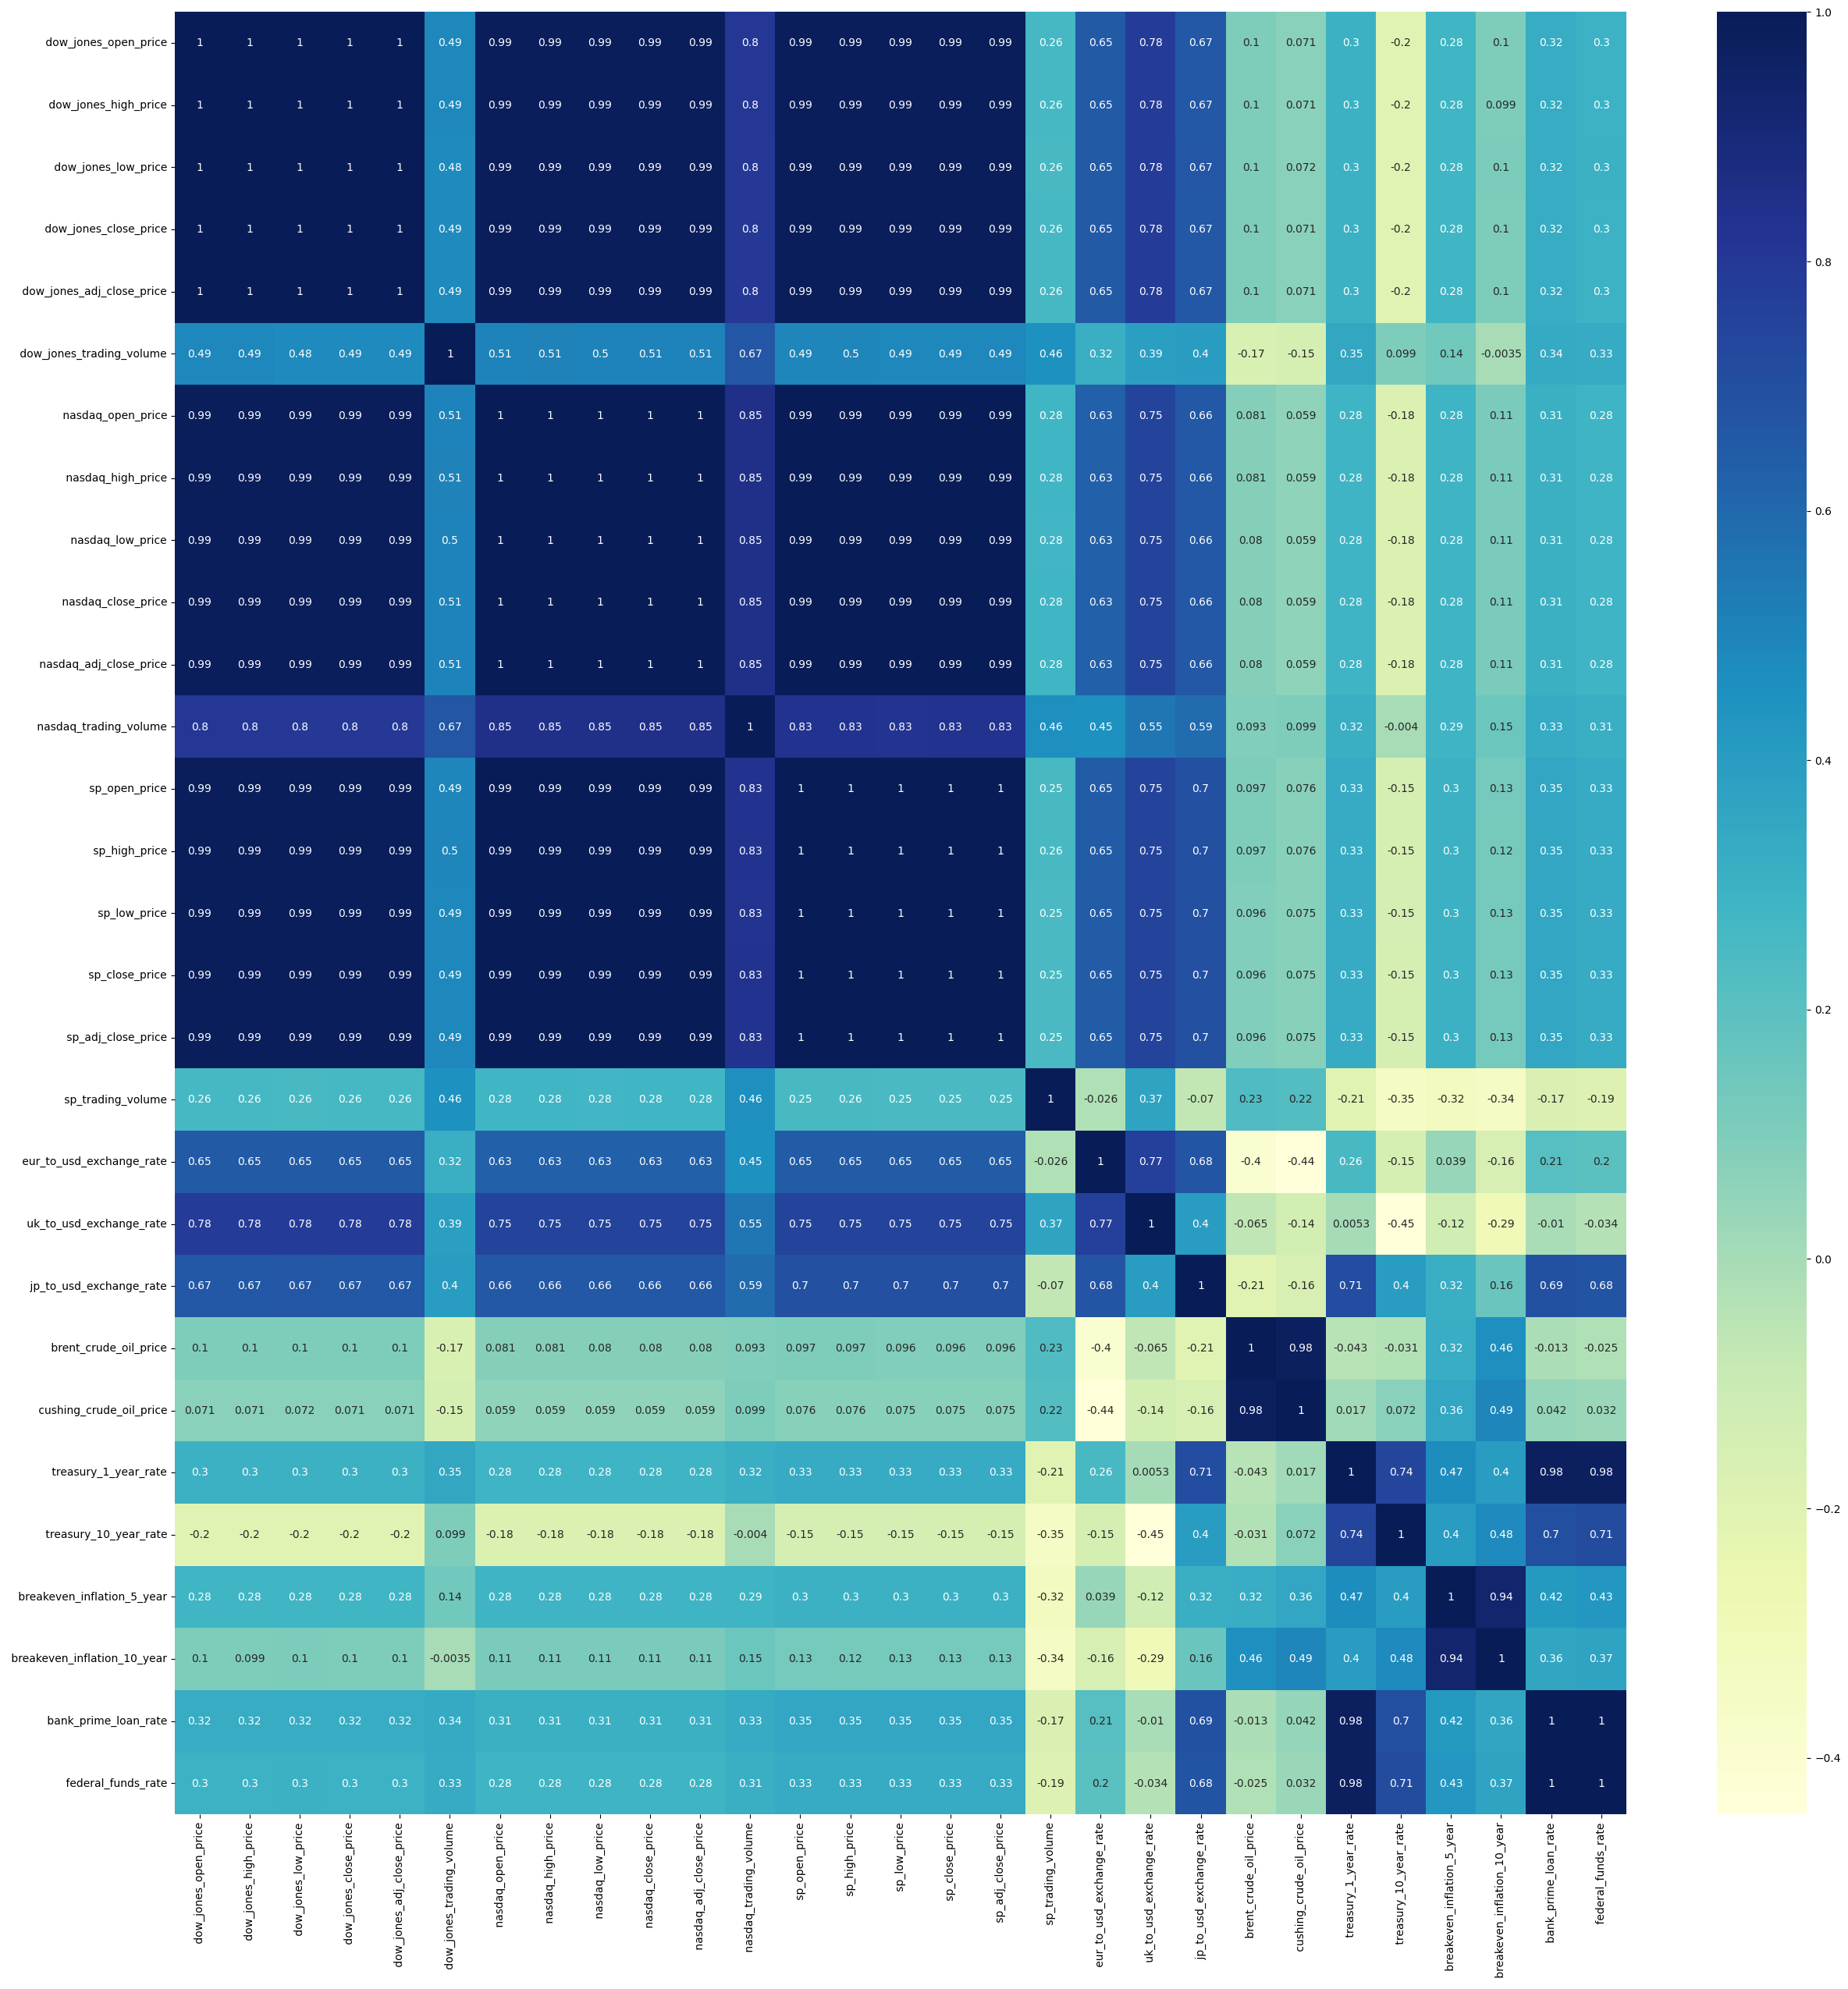

In [29]:
draw_heatmap(data)

In [30]:
for col in data.columns:
    data[col] = data[col].apply(lambda x: np.log(x+100))

In [31]:
features = [
[' dow_jones_open_price', ' dow_jones_high_price', ' dow_jones_low_price', ' dow_jones_close_price', ' dow_jones_adj_close_price', ' dow_jones_trading_volume'],
[' nasdaq_open_price', ' nasdaq_high_price', ' nasdaq_low_price', ' nasdaq_close_price', ' nasdaq_adj_close_price', ' nasdaq_trading_volume'],
[' sp_open_price', ' sp_high_price', ' sp_low_price', ' sp_close_price', ' sp_adj_close_price'],
[' eur_to_usd_exchange_rate', ' uk_to_usd_exchange_rate', ' jp_to_usd_exchange_rate'],
[' treasury_1_year_rate', ' treasury_10_year_rate'],
[' breakeven_inflation_5_year', ' breakeven_inflation_10_year'],
[' bank_prime_loan_rate', ' federal_funds_rate'],
]
labels = {' brent_crude_oil_price': [data[' brent_crude_oil_price'].mean(), data[' brent_crude_oil_price'].std()],
          ' cushing_crude_oil_price': [data[' cushing_crude_oil_price'].mean(), data[' cushing_crude_oil_price'].std()]}

In [32]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [33]:
models = {
    'LinearRegression': LinearRegression(),
    'HuberRegressor': HuberRegressor()
}

In [91]:
def plotting(res):
    plt.plot(res.index, res.y_pred, label='predict')
    plt.plot(res.index, res.y_test, label='test')
    plt.legend()
    plt.show()

def training(name, feature, label):
    X_train, X_test, y_train, y_test = train_test_split(data[feature], data[label], test_size=0.2, random_state=42)
    models[name].fit(X_train, y_train)
    y_pred = models[name].predict(X_test)
    y_pred, y_test = np.exp(y_pred*labels[label][1]+labels[label][0])-100, np.exp(y_test*labels[label][1]+labels[label][0])-100
    print(name, 'Label:', label)
    print('Features:', *feature)
    print('RMSE:', root_mean_squared_error(y_pred, y_test))
    print('-------------------------------------------------')
    return pd.DataFrame({'y_pred': y_pred, 'y_test': y_test}).sort_index()

In [108]:
total_features = list(set(data.columns) - set(labels))
res = training('LinearRegression', total_features, ' cushing_crude_oil_price')
plotting(res)

LinearRegression Label:  cushing_crude_oil_price
Features:  treasury_1_year_rate  eur_to_usd_exchange_rate  dow_jones_open_price  sp_close_price  bank_prime_loan_rate  sp_adj_close_price  treasury_10_year_rate  nasdaq_open_price  nasdaq_low_price  uk_to_usd_exchange_rate  federal_funds_rate  breakeven_inflation_10_year  nasdaq_close_price  sp_low_price  dow_jones_adj_close_price  sp_open_price  nasdaq_adj_close_price  dow_jones_low_price  dow_jones_close_price  nasdaq_trading_volume  breakeven_inflation_5_year  dow_jones_trading_volume  dow_jones_high_price  nasdaq_high_price  jp_to_usd_exchange_rate  sp_high_price  sp_trading_volume
RMSE: 10.636881713752373
-------------------------------------------------


In [110]:
with gr.Blocks() as demo:
    with gr.Row():
        with gr.Column():
            model = gr.Dropdown(choices=["Linear Regression", "Decision Tree", "Random Forest"],
                    value="Linear Regression",
                    label="Model",
                    interactive=True)
            rmse = gr.Textbox(label='RMSE')
        
        res = res.reset_index()
        res.columns = ['index', 'predict', 'test']
        plot_data = pd.melt(res.reset_index(), id_vars=['index'], value_vars=['predict', 'test'], var_name='variable', value_name='value')
        gr.LinePlot(plot_data, x='index', y='value', color='variable',
                    title='Prediction of cushing oil price', y_title='Price($)',
                    tooltip=['index', 'variable', 'value'], width=600, height=400)

demo.launch()

* Running on local URL:  http://127.0.0.1:7897
* To create a public link, set `share=True` in `launch()`.
